# cleaning the data from ANZ virtual program

1. Data :
The data is provided by the Data ANZ itself when we enroll ourselves in their program.
2. Features :
status : denotes the status of the transaction posted or authorized for transaction.

card_present_flag : Did the customer have a card during the transaction (1.1 = Yes or 0.0 = No).

bpay_biller_code : unique code of the BPay Transaction done by the customer.

account : account number of the customers who made transaction.

currency : currency type in which the transaction has been done (AUD dollars).

long_lat : Longitude and Latitude location of the customer.

txn_description : the mode of transaction the customer has done.

merchant_id : the merchant id where the customers have done their transaction.

merChant_code : unique merchant code for each customer.

first_name : first name of the customer.

balance : balance the customer had during the transaction of period 3 months.

date : date when the transaction took place.

gender : gender of the customer(Male or Female).

age : age of the customer.

merchant_suburb : the district or city where the merchant is located.

merchant_state : the state where the merchant is located.

extraction : extraction of the transaction data.

amount : the amount transacted by the customer.

transaction_id : unique transaction id given by the merchant when the customer makes an transaction.

country : country where the customer's are located (Australia).

customer_id = id for the customer's to differentiate them as unique.

merchant_long_lat : the latitude and longitude location of the merchant.

movement : mode of transaction (credit or debit).

In [47]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
# for map
import plotly.express as px

In [2]:
# import the dataset for cleaning
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [3]:
# how many accounts available in this dataset
df['account'].value_counts().count()

100

In [4]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [5]:
df['transaction_id'].duplicated().sum()

0

In [6]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

### Assessing the data with Excel and python pandas we found:
- long_lat column is the position of the transaction in the map, it needs to be separated and the type is float and to be checked if any value  out side the region
- extraction column change data type to datetime
- amount column check any outliers and exceding balance

##### Merchant:
- merchant_long_lat column missing 4326 values and need to be separated with changing data type
- merchant_id column contains 4326 missing values
- merchant_code column should be droped because of the huge number of the missing values
- merchant_suburb and merchant_state are missing 4326 values
- card_present_flag column has the values 1, 0 but it has 4326 missing values and type float but should be int
- bpay_biller_code column should be droped because of the huge number of the missing values

##### the missing values in Merchant columns is according to the status when it is posted

In [7]:
# drop the columns with huge number of missing values
df.drop(labels=['merchant_code', 'bpay_biller_code'], axis=1, inplace=True)

In [8]:
# split the long_lat column into long and lat 
long = []
lat = []
for r in df['long_lat']:
    position = str(r)
    position = position.split(sep='-')
    long.append(float(position[0]))
    lat.append(float(position[1]))

df['long'] = long
df['lat'] = lat
df.drop('long_lat', axis=1, inplace=True)
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,27.95
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,27.95
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,33.94
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,27.66
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,27.95


In [14]:
# change extraction column to time series 
df['extraction_date_time'] = pd.to_datetime(df['extraction'])
df.drop('extraction', axis=1, inplace=True)
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,extraction_date_time
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,27.95,2018-08-01 01:01:15+00:00
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,27.95,2018-08-01 01:13:45+00:00
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,33.94,2018-08-01 01:26:15+00:00
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,27.66,2018-08-01 01:38:45+00:00
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,27.95,2018-08-01 01:51:15+00:00


In [15]:
# average amount of transactions
df['amount'].mean()

187.93358797641784

In [16]:
# catigorize the data by the month
df['month_name'] = df['date'].dt.month_name()
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,date,gender,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,extraction_date_time,month_name
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,27.95,2018-08-01 01:01:15+00:00,August
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,27.95,2018-08-01 01:13:45+00:00,August
2,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,33.94,2018-08-01 01:26:15+00:00,August
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,27.66,2018-08-01 01:38:45+00:00,August
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,27.95,2018-08-01 01:51:15+00:00,August


In [20]:
# number of transactions per month
df[['amount', 'month_name']].groupby(by='month_name').count()

,amount
month_name,
August,3943
October,4087
September,4013


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Balance')

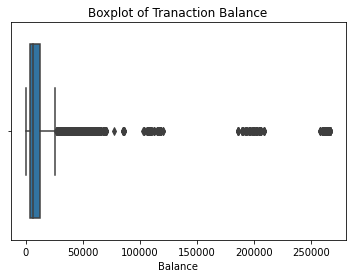

In [24]:
# detect outlires
# balance
sns.boxplot('balance',data = df)
plt.title("Boxplot of Tranaction Balance")
plt.xlabel("Balance")

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age')

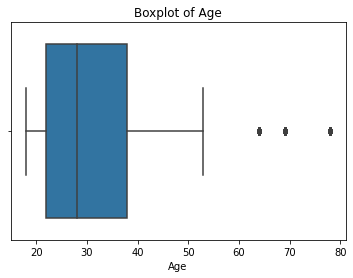

In [25]:
# age
sns.boxplot('age',data = df)
plt.title("Boxplot of Age")
plt.xlabel("Age")

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Amount')

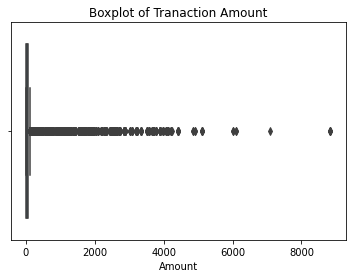

In [26]:
# amount
sns.boxplot('amount',data = df)
plt.title("Boxplot of Tranaction Amount")
plt.xlabel("Amount")

Text(0, 0.5, 'Count')

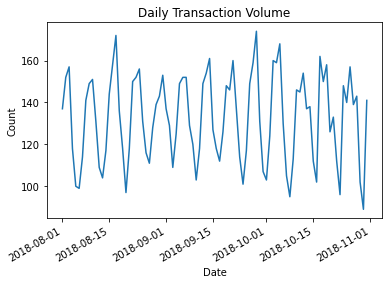

In [22]:
#Segmented analysis by Time
df_time = df.groupby('date').size()
df_time.plot()
plt.title("Daily Transaction Volume")
plt.xlabel("Date")
plt.ylabel("Count")

Text(0, 0.5, 'Amount')

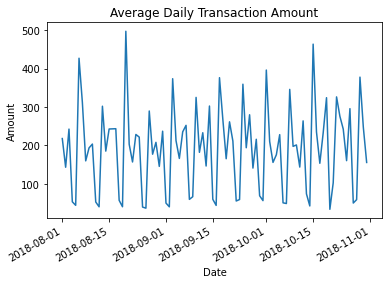

In [23]:
df_tran = df.groupby('date')['amount'].mean()
df_tran.plot()
plt.title("Average Daily Transaction Amount")
plt.xlabel("Date")
plt.ylabel("Amount")

### mapping the data in map

In [28]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [30]:
txn_locs = df[['account', 'long', 'lat']]
txn_loc = txn_locs.groupby(['account'], as_index=False).first()
txn_loc = txn_loc[['account', 'long', 'lat']]
txn_loc

,account,long,lat
0,ACC-1037050564,153.10,27.66
1,ACC-1056639002,145.03,37.91
2,ACC-1199531521,116.02,31.87
3,ACC-1217063613,147.61,37.82
4,ACC-1222300524,151.23,33.94
...,...,...,...
95,ACC-854938045,147.63,22.84
96,ACC-90814749,151.68,32.98
97,ACC-958000567,130.90,12.37
98,ACC-964839203,146.92,36.07


In [39]:
# long and lat of australia
aus_map = [-25.2744, 133.7751]
site_map = folium.Map(location=aus_map, zoom_start=10)

In [40]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(aus_map, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Transactions australia'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    aus_map,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'Australia',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [45]:
# Initial the map
site_map = folium.Map(location=aus_map, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for lat, long, name in zip(txn_loc.lat, txn_loc.long, txn_loc['account']):

    circle = folium.Circle([-lat, long], radius=100, color='#d35400', fill=True).add_child(folium.Popup(name))
    marker = folium.map.Marker([-lat, long], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % name, ))
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

#### different mapping

In [49]:
df['lat'] = -df['lat']

In [50]:
# calcualte transaction volume by location
df_volume = df.groupby(['lat','long']).size()
df_volume = pd.DataFrame(df_volume.reset_index())
df_volume.columns = ['lat','long','volume']
df_volume['vs'] = np.log(df_volume.volume/10)
df_volume.head()

,lat,long,volume,vs
0,-573.00,255.00,123,2.509599
1,-42.88,147.31,88,2.174752
2,-38.03,145.35,52,1.648659
3,-37.97,147.08,152,2.721295
4,-37.95,145.06,76,2.028148


In [51]:
fig = px.scatter_mapbox(df_volume, lat="lat", lon="long",color="volume", size="vs", hover_name="volume", hover_data=["volume"],
                        color_discrete_sequence=["fuchsia"], zoom=2.5)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [52]:
# calcualte average transaction amount by location
df_amount = df.groupby(['lat','long'])['amount'].mean()
df_amount = pd.DataFrame(df_amount.reset_index())
df_amount.columns = ['lat','long','amount']
df_amount['vs'] = np.log(df_amount.amount/10)

In [53]:
fig = px.scatter_mapbox(df_amount, lat="lat", lon="long", color="amount", size="amount", hover_name="amount",
                        hover_data=["amount"],
                        color_discrete_sequence=["fuchsia"], zoom=2.5)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [54]:
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="amount", hover_name="amount",
                        hover_data=["amount"],
                        color_discrete_sequence=["fuchsia"], zoom=2.5)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()